In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from pycaret.regression import *

In [2]:
df_treated = pd.read_csv('data/df_treated.csv').set_index('date')
df_treated.index = pd.to_datetime(df_treated.index)

Nov_df = pd.read_csv('data/Nov_df.csv').set_index('date')
Nov_df.index = pd.to_datetime(Nov_df.index)

In [3]:
numeric_col = ['Building0', 'Building1', 'Building3', 'Building4', 'Building5',
                   'Building6', 'Solar0', 'Solar1', 'Solar2', 'Solar3', 'Solar4', 'Solar5',
                   'temperature', 'dewpoint_temperature', 'wind_speed',
                   'mean_sea_level_pressure', 'relative_humidity_01',
                   'surface_solar_radiation', 'surface_thermal_radiation',
                   'total_cloud_cover']
df_treated[numeric_col] = df_treated[numeric_col].apply(pd.to_numeric)
df_numerics = df_treated[numeric_col]

categorical_col = ['COVID', 'Break', 'Semester', 'Exams', 'Monash_occupancy',
               'month', 'day', 'hour']
df_treated[categorical_col] = df_treated[categorical_col].astype('category')
df_categorical = df_treated[categorical_col]

In [4]:
df_hour = df_treated.resample('H').last()
Nov_hour = Nov_df.resample('H').last()

# Buildings

In [5]:
y_train_B0 = df_hour[:'2020-09-21 14:00:00']
y_test_B0 = df_hour['2020-09-21 15:00:00':]

print(y_train_B0.shape, y_test_B0.shape)
y_train_B0.shape[0] + y_test_B0.shape[0]

(8727, 28) (969, 28)


9696

## Building0

In [6]:
s_B0 = setup(data=y_train_B0, test_data=y_test_B0, target='Building0', fold_strategy='timeseries', 
          fold=3, transform_target=True, session_id=123, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,Building0
2,Original Data,"(8727, 28)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8727, 276)"


In [7]:
best_B0 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,42.2059,11693.7125,85.2186,-11.5103,0.3427,0.3399,1.1300
lasso,Lasso Regression,43.4906,12132.0036,86.5965,-11.9969,0.3490,0.3698,0.5600
lr,Linear Regression,53.3374,5527.0315,70.9455,-3.4739,0.4582,0.4753,1.0233
par,Passive Aggressive Regressor,33.5553,1983.3776,43.0730,0.0921,0.3141,0.5259,0.1000
lightgbm,Light Gradient Boosting Machine,29.2056,1496.5813,37.5537,-0.2051,0.2990,0.5264,1.0767
gbr,Gradient Boosting Regressor,28.4280,1438.5619,36.8610,-0.1488,0.2941,0.5273,8.2000
et,Extra Trees Regressor,27.2572,1292.4009,35.2926,0.0253,0.2912,0.5822,5.3200
rf,Random Forest Regressor,28.6735,1412.9727,36.8440,-0.0785,0.3021,0.6074,13.6833
huber,Huber Regressor,31.1246,1562.0472,39.4886,0.0727,0.3201,0.6233,0.7267
omp,Orthogonal Matching Pursuit,29.4139,1491.7215,38.6132,0.0519,0.3148,0.6301,0.5333


In [8]:
predictions_B0 = predict_model(best_B0, data=df_hour)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,22.5061,960.8296,30.9973,0.7086,0.2943,0.2895


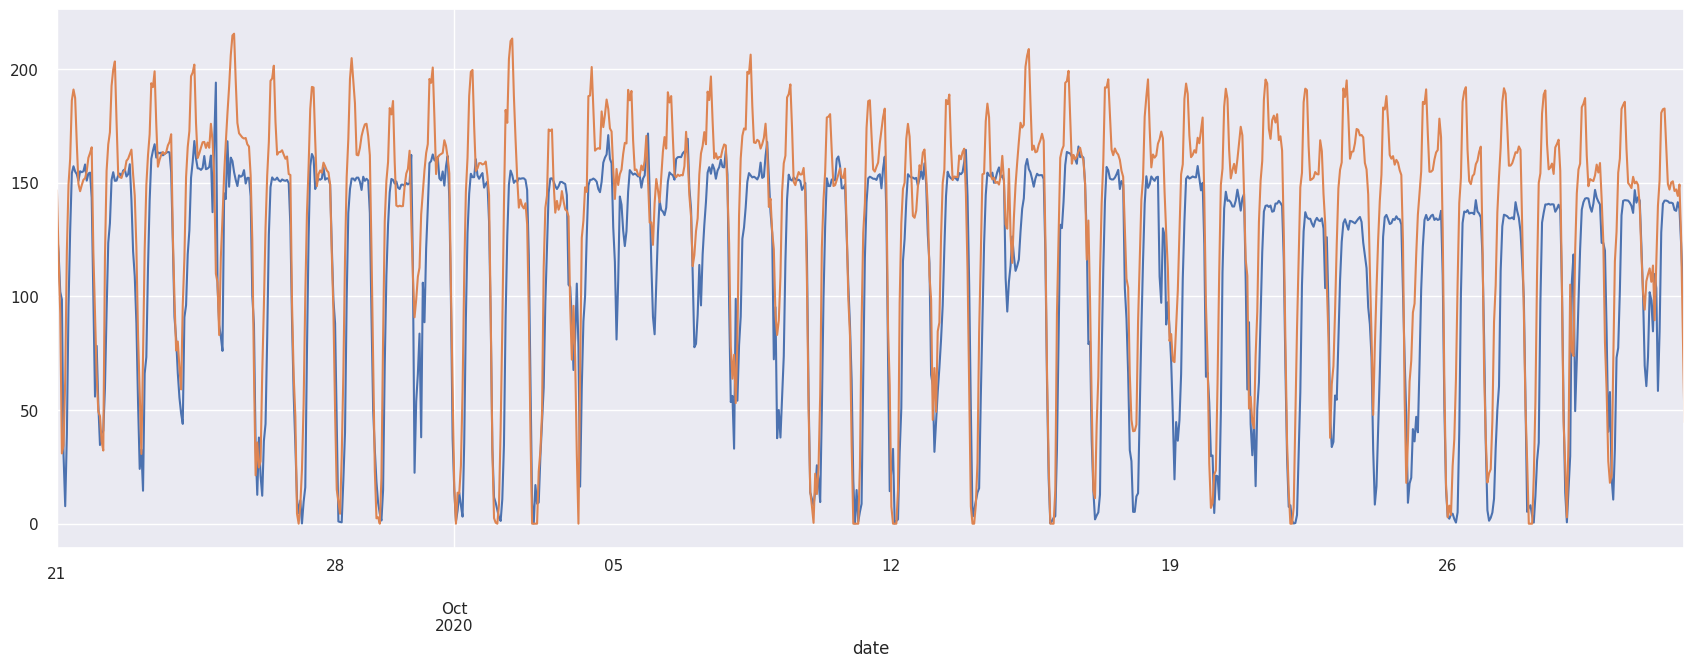

In [9]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Building0['2020-09-21':].plot(linestyle='-')), (predictions_B0.Label['2020-09-21':].plot(linestyle='-'))

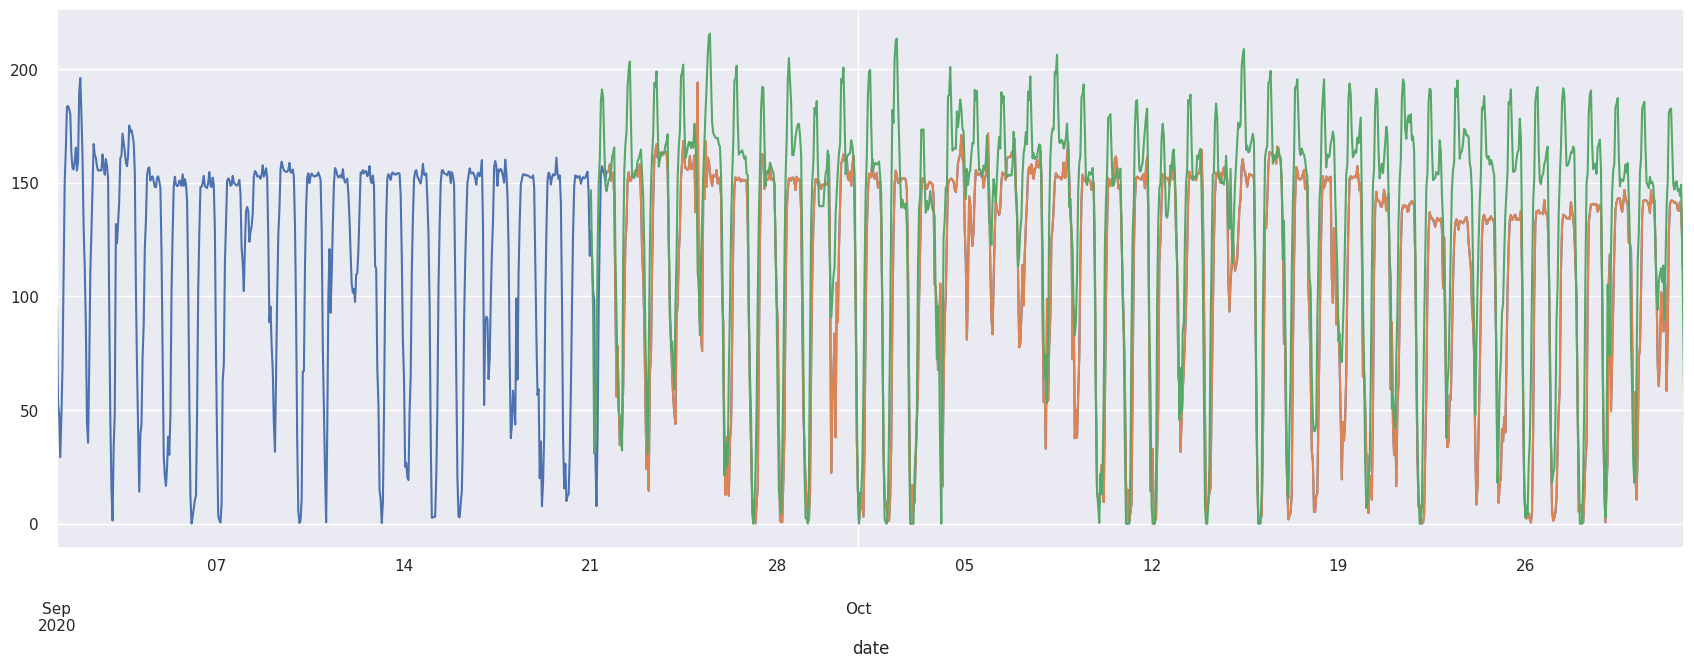

In [10]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Building0['2020-09-01':].plot(linestyle='-')), \
     (y_test_B0.Building0['2020-09-21':].plot(linestyle='-')), \
     (predictions_B0.Label['2020-09-21':].plot(linestyle='-'))

In [11]:
predictions_B0['2020-09-21 15:00:00':][['Building0', 'Label']]

,Building0,Label
date,,
2020-09-21 15:00:00,154.6,148.892731
2020-09-21 16:00:00,155.0,151.241211
2020-09-21 17:00:00,158.0,151.944733
2020-09-21 18:00:00,150.9,155.016739
2020-09-21 19:00:00,154.0,160.915680
...,...,...
2020-10-31 19:00:00,141.4,144.141571
2020-10-31 20:00:00,138.5,149.164642
2020-10-31 21:00:00,123.0,125.953140


In [12]:
final_best_B0 = finalize_model(best_B0)

/home/studio-lab-user/.conda/envs/pycaret_38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320.01702880859375, tolerance: 0.2184000015258789
  model = cd_fast.enet_coordinate_descent(
/home/studio-lab-user/.conda/envs/pycaret_38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 676.0302734375, tolerance: 0.4364999830722809
  model = cd_fast.enet_coordinate_descent(
/home/studio-lab-user/.conda/envs/pycaret_38/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1153.5234375, tolerance: 0.6545999646186829
  model = cd_fast.enet_coordinate_descent(


### November forecast

In [13]:
predictions_future_B0 = predict_model(final_best_B0, data=Nov_hour)
predictions_future_B0.Label.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0,0,0,0,0,0


date
2020-11-01 00:00:00    103.083199
2020-11-01 01:00:00     90.411171
2020-11-01 02:00:00     88.182495
2020-11-01 03:00:00     87.241547
2020-11-01 04:00:00     92.061951
Freq: H, Name: Label, dtype: float32

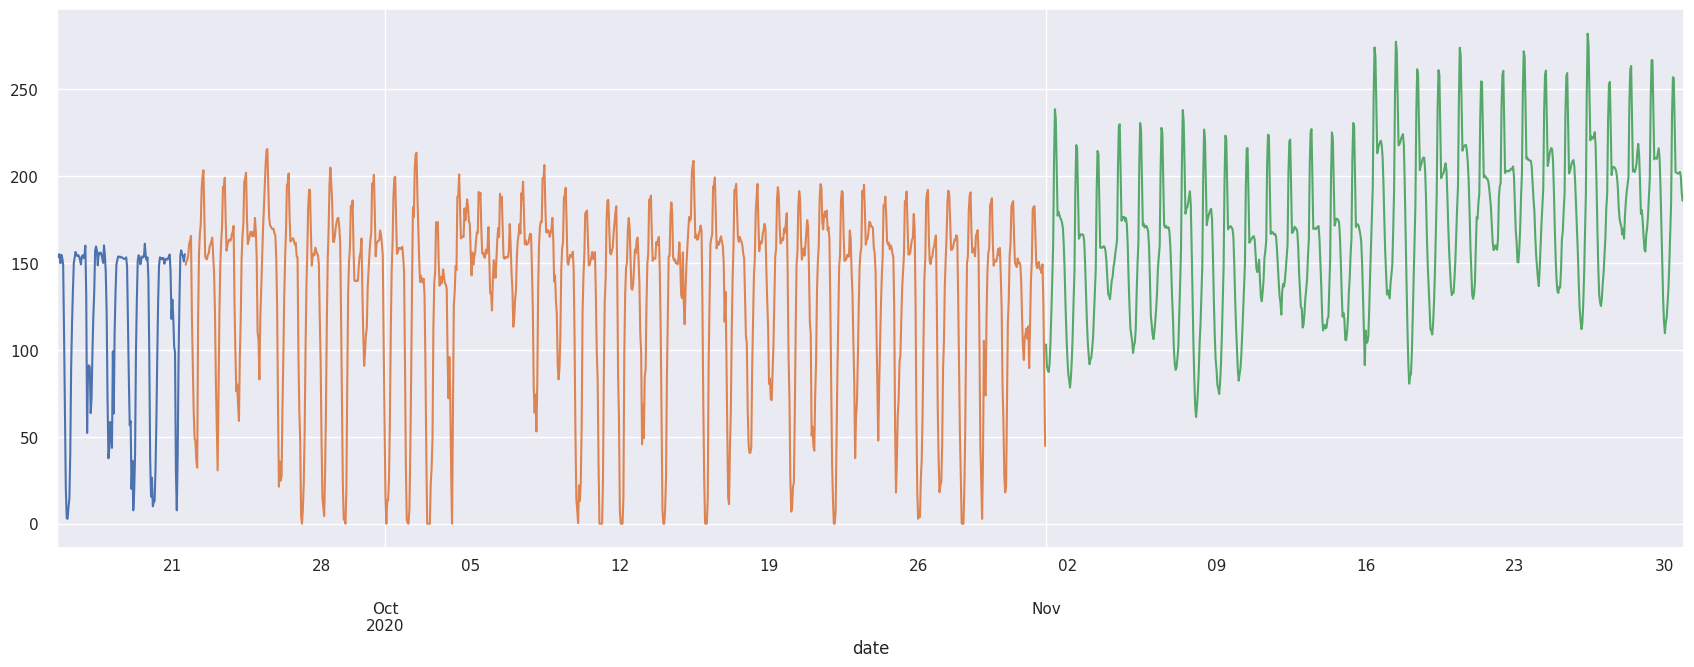

In [14]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_B0.Building0['2020-09-15 14:00:00':].plot(linestyle='-')), \
     (predictions_B0.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_B0.Label.plot(linestyle='-'))

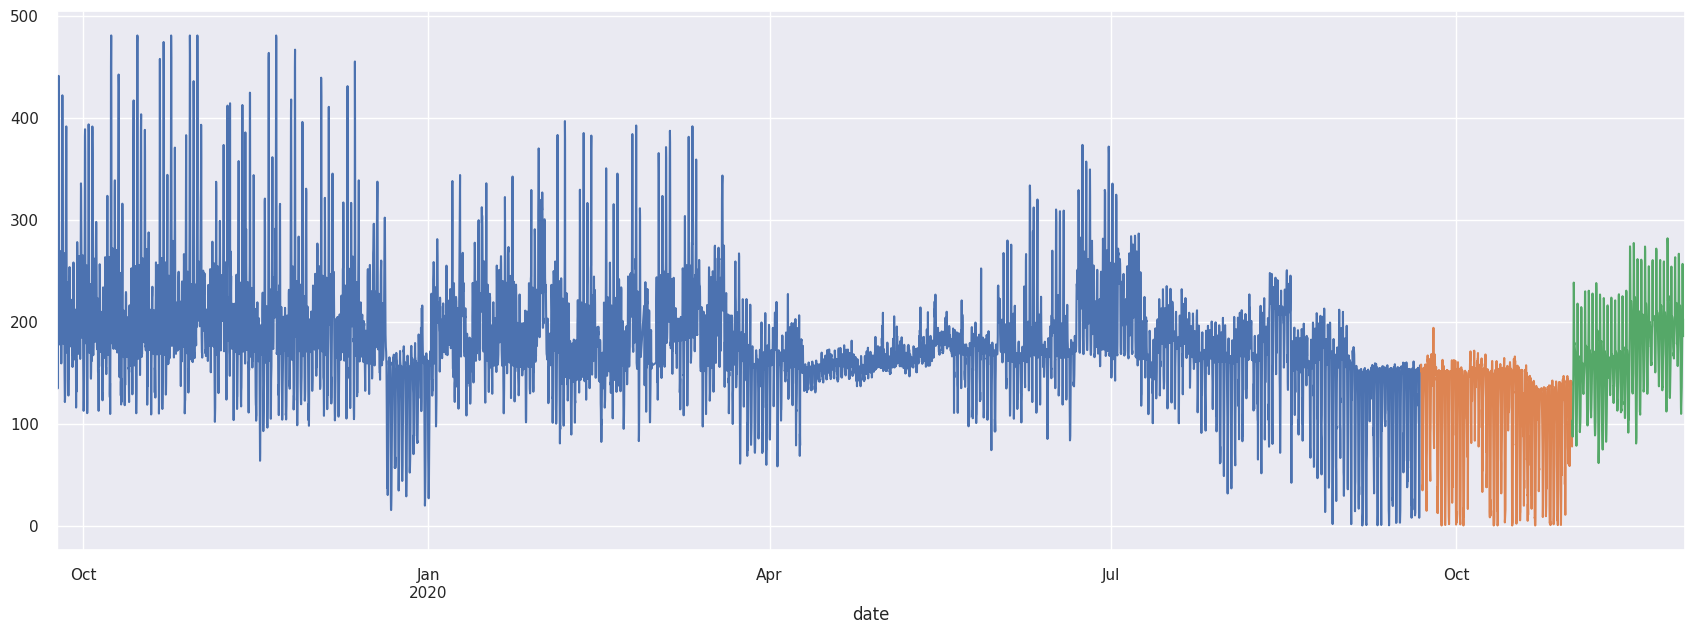

In [15]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_B0.Building0['2019-09-01':].plot(linestyle='-')), \
     (y_test_B0.Building0['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_B0.Label.plot(linestyle='-'))

## Building 3

In [16]:
y_train_B3 = df_hour[:'2020-09-21 14:00:00']
y_test_B3 = df_hour['2020-09-21 15:00:00':]

print(y_train_B3.shape, y_test_B3.shape)
y_train_B3.shape[0] + y_test_B3.shape[0]

(8727, 28) (969, 28)


9696

In [17]:
s_B3 = setup(data=y_train_B3, test_data=y_test_B3, target='Building3', fold_strategy='timeseries', 
          fold=3, transform_target=True, session_id=123, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,Building3
2,Original Data,"(8727, 28)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8727, 265)"


In [18]:
best_B3 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,47.5349,5122.2821,67.4657,0.7870,0.1388,0.1113,5.6033
rf,Random Forest Regressor,48.5729,4839.8951,66.4603,0.7833,0.1427,0.1161,14.6867
lightgbm,Light Gradient Boosting Machine,48.7589,5043.5959,69.8011,0.7675,0.1475,0.1177,1.1700
gbr,Gradient Boosting Regressor,53.6935,5938.7991,75.1800,0.7475,0.1540,0.1255,8.9833
ada,AdaBoost Regressor,57.8038,6361.7769,78.6634,0.7489,0.1694,0.1378,3.2600
dt,Decision Tree Regressor,63.9817,8830.5615,90.8316,0.6211,0.1920,0.1510,0.6200
knn,K Neighbors Regressor,78.2700,12731.9960,111.1181,0.5011,0.2376,0.1780,1.1100
llar,Lasso Least Angle Regression,142.3155,33234.5257,173.1104,-0.0453,0.3878,0.3624,0.9367
dummy,Dummy Regressor,142.3155,33234.5258,173.1104,-0.0453,0.3878,0.3624,0.0433


In [19]:
predictions_B3 = predict_model(best_B3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,27.8663,1498.6748,38.7127,0.8403,0.1049,0.0821


In [20]:
index = y_test_B3.index
predictions_B3 = predictions_B3.set_index(index)

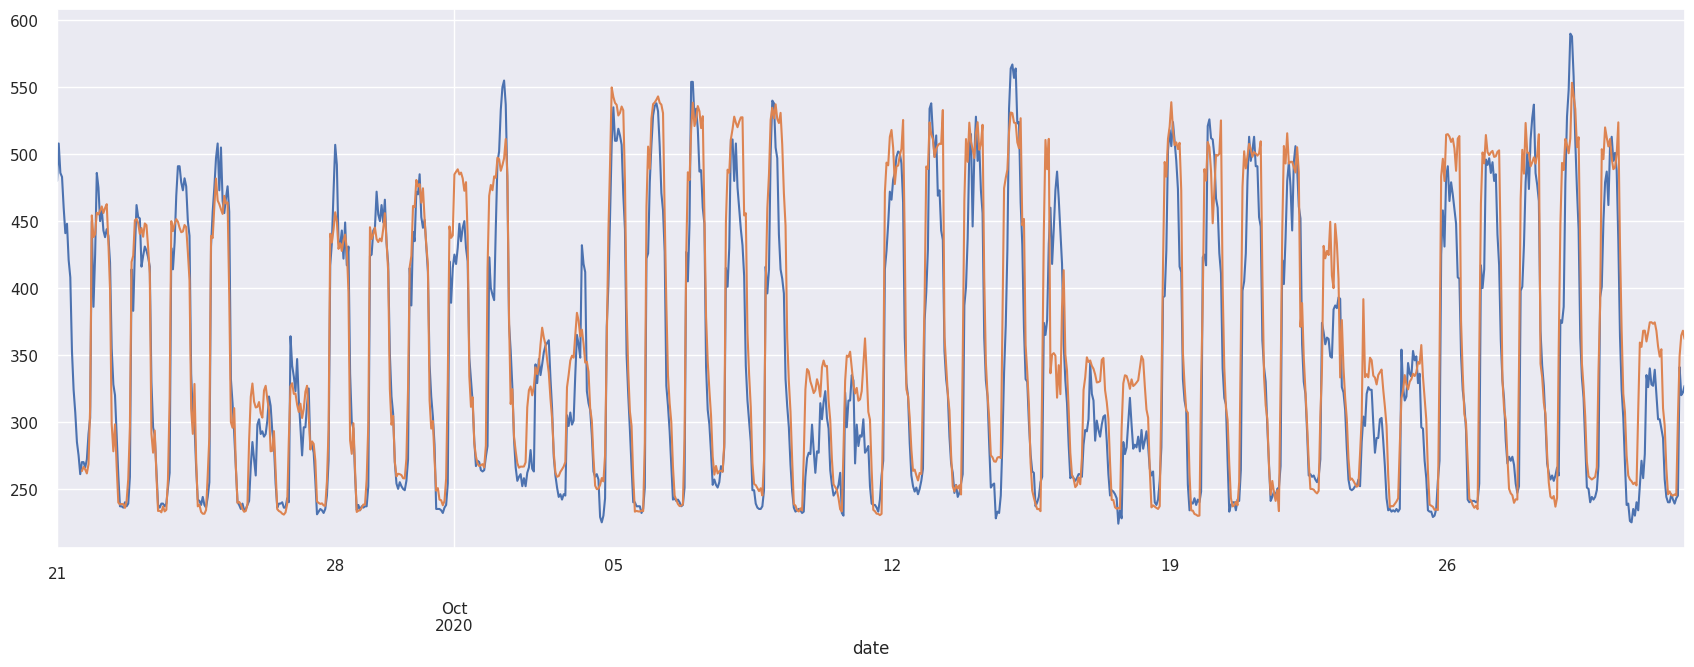

In [21]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Building3['2020-09-21':].plot(linestyle='-')), (predictions_B3.Label['2020-09-21':].plot(linestyle='-'))

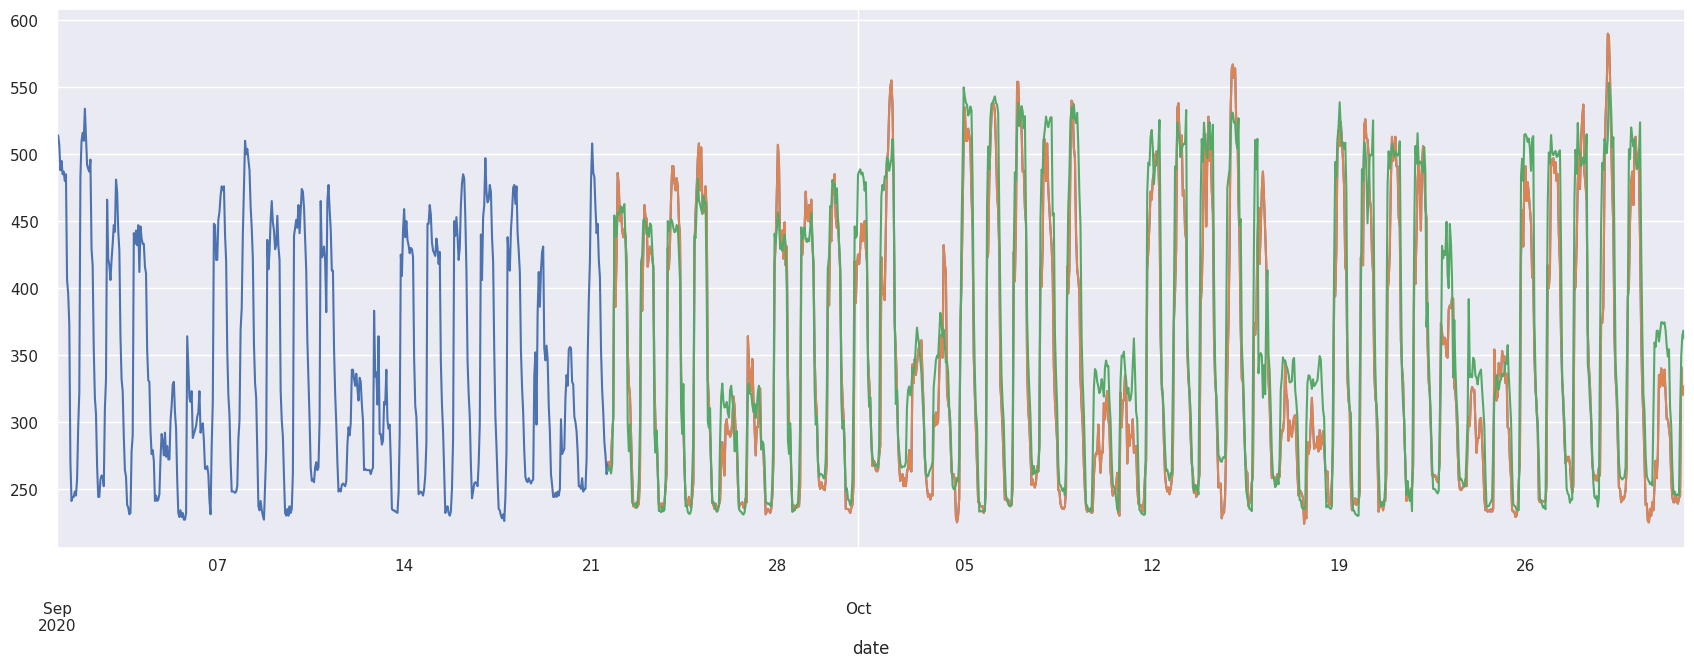

In [22]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Building3['2020-09-01':].plot(linestyle='-')), \
     (predictions_B3.Building3['2020-09-21':].plot(linestyle='-')), \
     (predictions_B3.Label['2020-09-21':].plot(linestyle='-'))

In [23]:
final_best_B3 = finalize_model(best_B3)

### November forecast

In [24]:
predictions_future_B3 = predict_model(final_best_B3, data=Nov_hour)
predictions_future_B3.Label.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0,0,0,0,0,0


date
2020-11-01 00:00:00    461.767423
2020-11-01 01:00:00    459.937602
2020-11-01 02:00:00    465.976375
2020-11-01 03:00:00    456.850293
2020-11-01 04:00:00    447.012246
Freq: H, Name: Label, dtype: float64

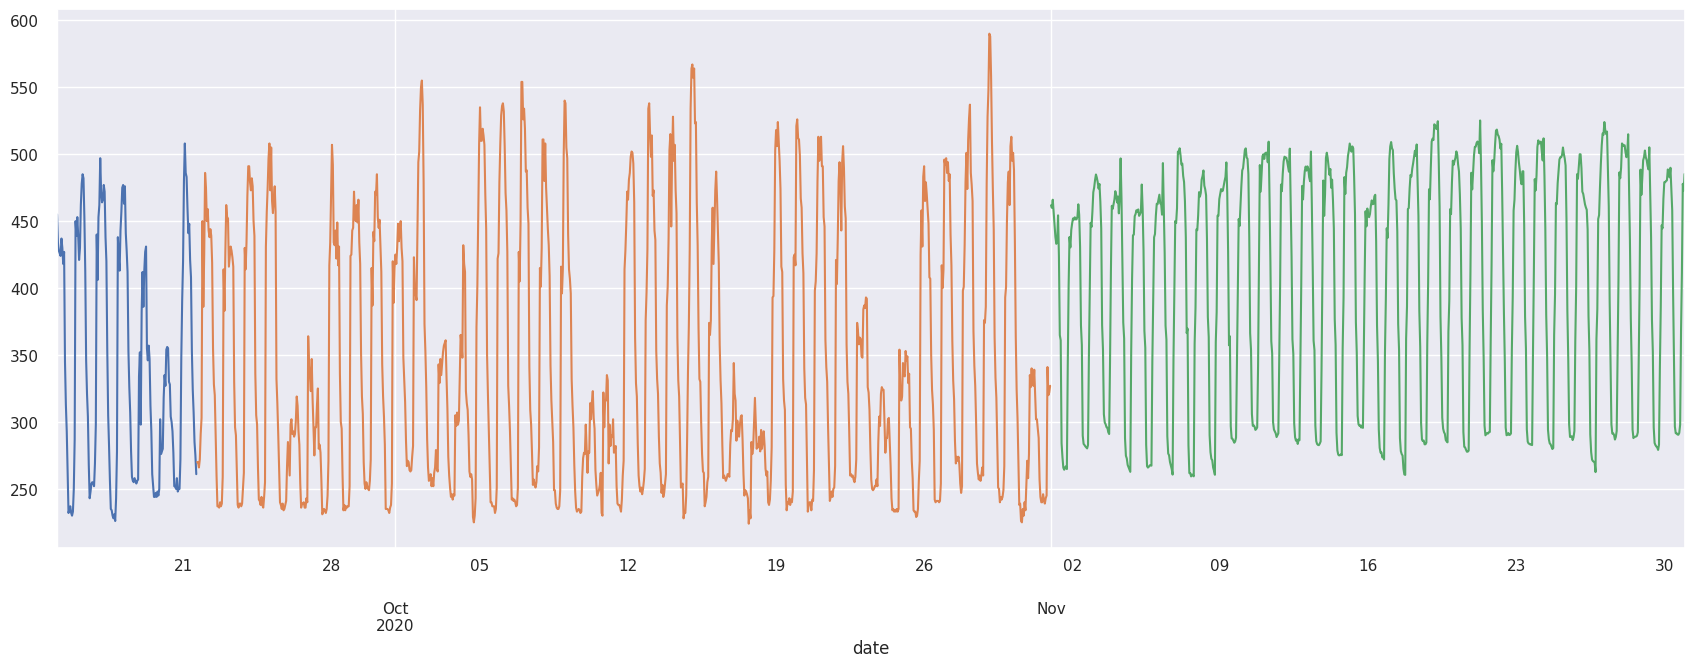

In [25]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_B3.Building3['2020-09-15':].plot(linestyle='-')), \
     (y_test_B3.Building3['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_B3.Label.plot(linestyle='-'))

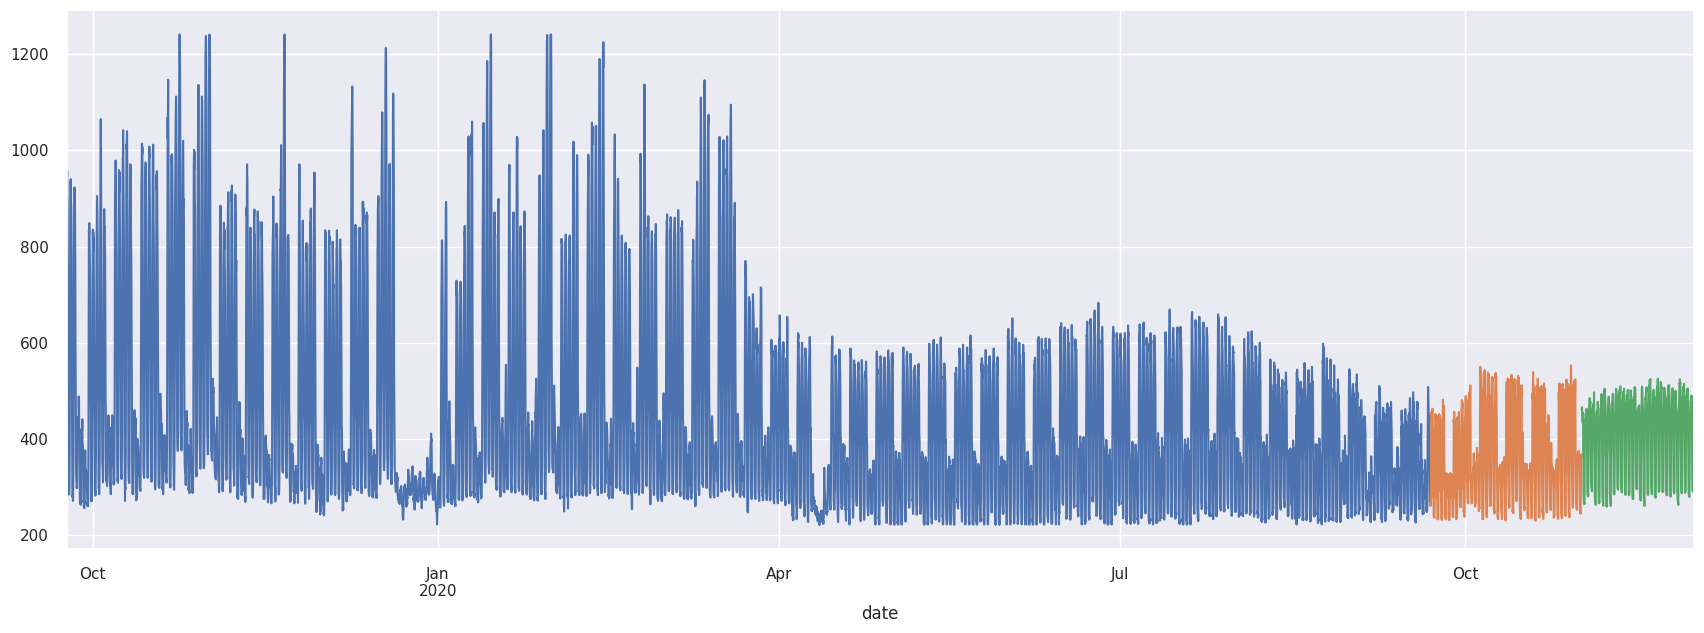

In [26]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_B3.Building3['2019-09-01':].plot(linestyle='-')), \
     (predictions_B3.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_B3.Label.plot(linestyle='-'))

# Solar panels

## Solar0

In [27]:
y_train_S0 = df_hour['2020-05-21 05:00:00':'2020-10-15 14:00:00']
y_test_S0 = df_hour['2020-10-15 15:00:00':]

print(y_train_S0.shape, y_test_S0.shape)
y_train_S0.shape[0] + y_test_S0.shape[0]

(3538, 28) (393, 28)


3931

In [28]:
s_S0 = setup(data=y_train_S0, test_data=y_test_S0, target='Solar0', fold_strategy='timeseries', 
          fold=3, transform_target=True, session_id=456, feature_interaction=True)

,Description,Value
0,session_id,456
1,Target,Solar0
2,Original Data,"(3538, 28)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3538, 190)"


In [29]:
best_S0 = compare_models(sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.4061,10.0189,2.9915,0.9152,0.2094,0.5414,0.9700
rf,Random Forest Regressor,1.8045,21.4175,4.1565,0.8298,0.2708,0.5594,2.2633
lightgbm,Light Gradient Boosting Machine,1.7214,16.3230,3.7547,0.8720,0.2272,0.5742,0.4600
gbr,Gradient Boosting Regressor,2.6196,55.8378,6.5126,0.6212,0.4936,0.5829,1.5200
dt,Decision Tree Regressor,1.6039,14.0106,3.4808,0.8858,0.2262,0.5861,0.5300
ada,AdaBoost Regressor,4.2868,89.7848,8.6870,0.3225,0.5775,0.8978,0.6033
knn,K Neighbors Regressor,1.7203,13.1014,3.4903,0.8813,0.3135,0.9609,0.9867
llar,Lasso Least Angle Regression,6.4428,159.3057,12.0633,-0.3730,1.6375,2.8138,0.9200
dummy,Dummy Regressor,6.4428,159.3057,12.0633,-0.3730,1.6375,2.8138,0.0433
omp,Orthogonal Matching Pursuit,1538.7407,5763023401.1355,43834.6827,-45902706.3415,0.7170,38.6972,0.5133


In [30]:
predictions_S0 = predict_model(best_S0, data=df_hour)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.6524,82.5150,9.0838,-0.5308,1.2716,0.0161


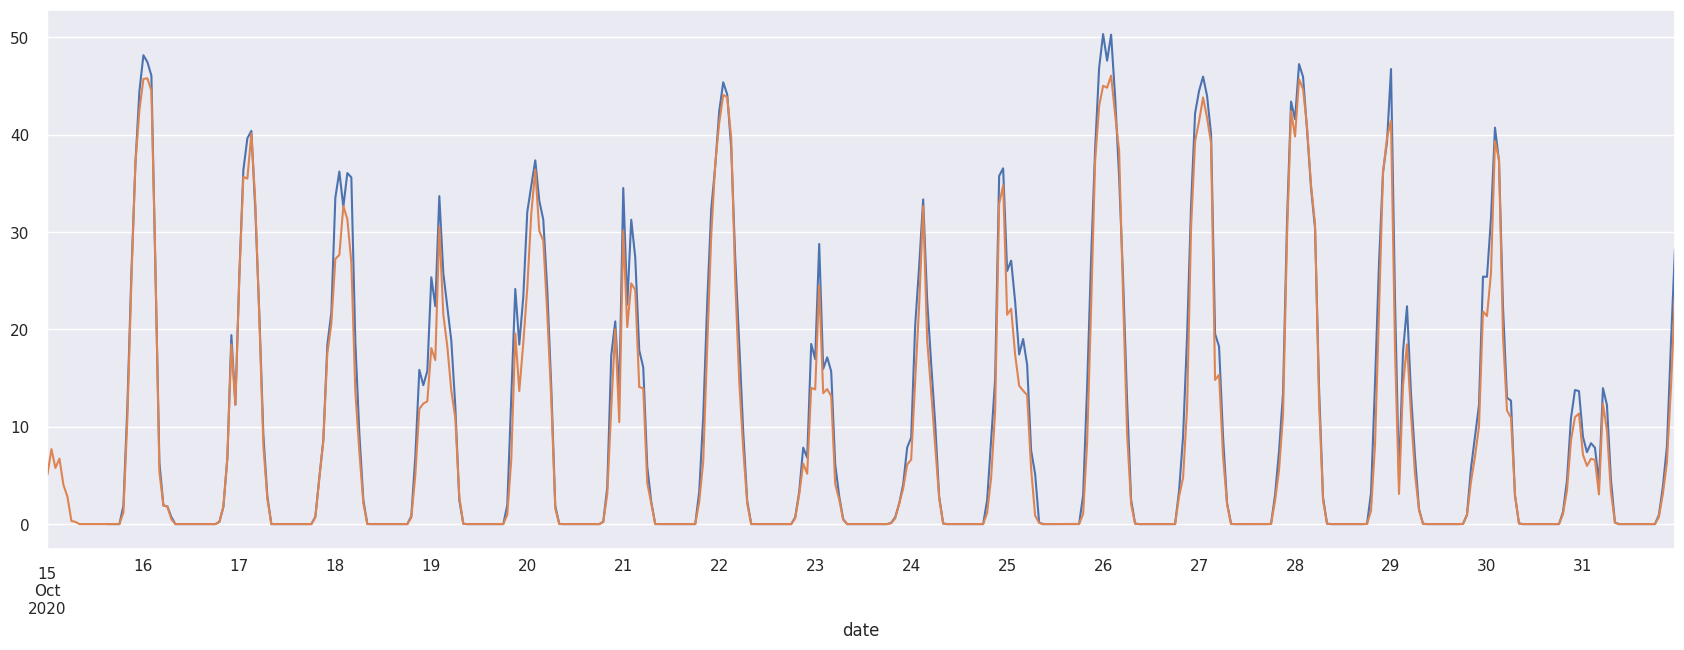

In [31]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_test_S0.Solar0.plot(linestyle='-')), (predictions_S0.Label['2020-10-15':].plot(linestyle='-'))

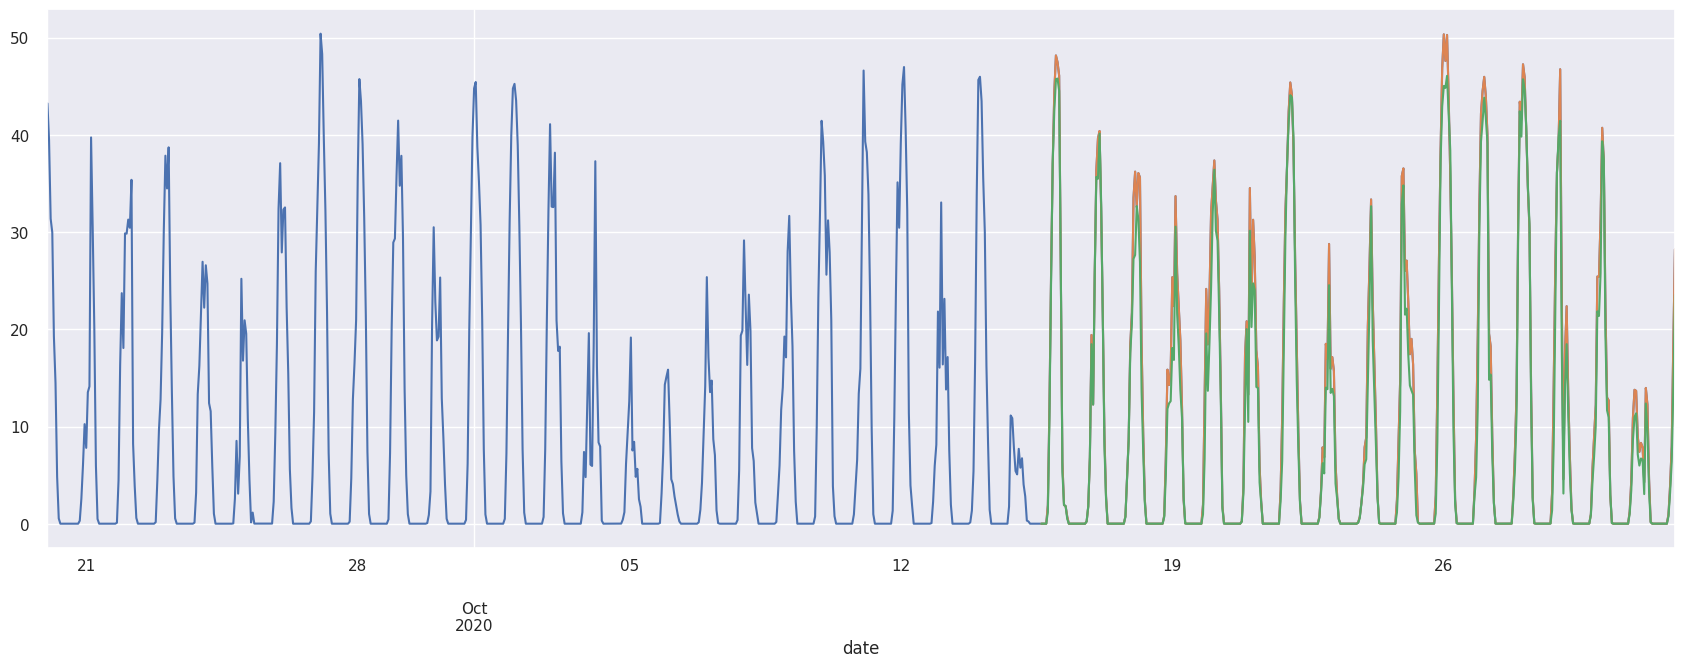

In [32]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Solar0['2020-09-20':].plot(linestyle='-')), \
     (df_hour.Solar0['2020-10-15 15:00:00':].plot(linestyle='-')), \
     (predictions_S0.Label['2020-10-15 15:00:00':].plot(linestyle='-'))

In [33]:
predictions_S0[['Solar0', 'Label']]['2020-10-15 15:00:00':]

,Solar0,Label
date,,
2020-10-15 15:00:00,0.01,0.010000
2020-10-15 16:00:00,0.01,0.010000
2020-10-15 17:00:00,0.01,0.010000
2020-10-15 18:00:00,0.01,0.010000
2020-10-15 19:00:00,1.90,1.200231
...,...,...
2020-10-31 19:00:00,0.95,0.757565
2020-10-31 20:00:00,3.91,3.164973
2020-10-31 21:00:00,8.00,6.374709


In [34]:
final_best_S0 = finalize_model(best_S0)

### November forecast

In [35]:
predictions_future_S0 = predict_model(final_best_S0, data=Nov_hour)
predictions_future_S0.Label.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0,0,0,0,0,0


date
2020-11-01 00:00:00    4.630314
2020-11-01 01:00:00    4.603903
2020-11-01 02:00:00    4.460040
2020-11-01 03:00:00    4.309197
2020-11-01 04:00:00    4.285597
Freq: H, Name: Label, dtype: float64

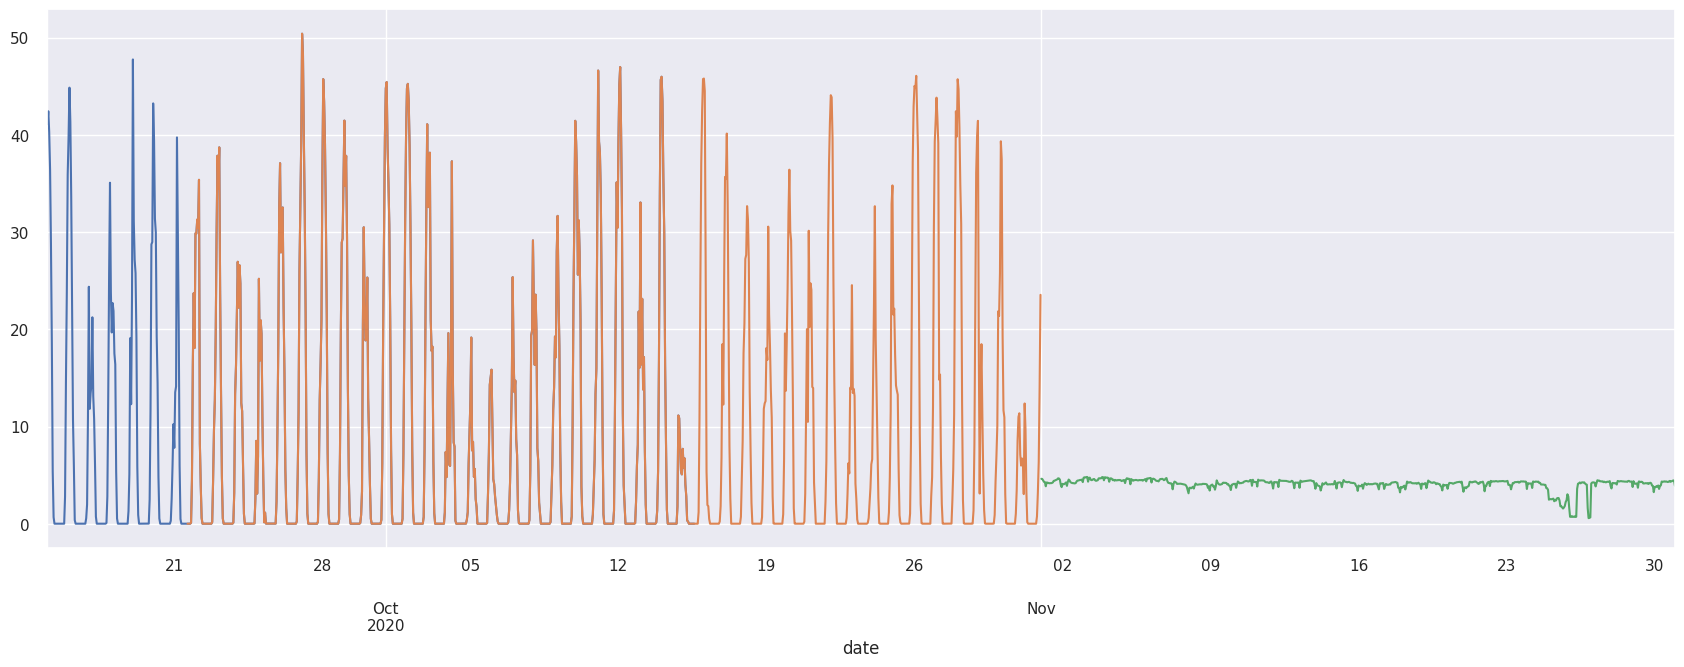

In [36]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_S0.Solar0['2020-09-15':].plot(linestyle='-')), \
     (predictions_S0.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_S0.Label.plot(linestyle='-'))

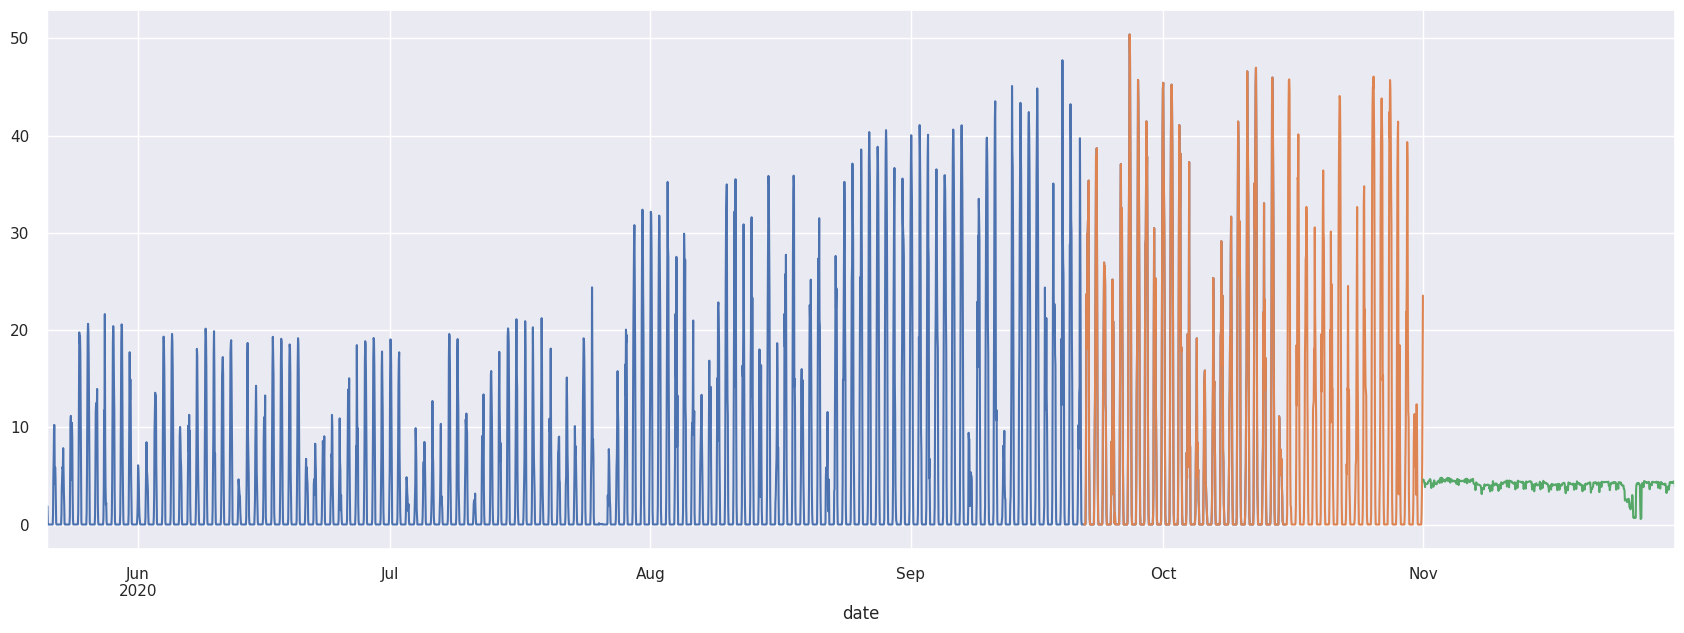

In [37]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_S0['2019-09-01':].Solar0.plot(linestyle='-')), \
     (predictions_S0.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_S0.Label.plot(linestyle='-'))

## Solar3

In [38]:
y_train_S3 = df_hour['2020-05-21 05:00:00':'2020-10-15 14:00:00']
y_test_S3 = df_hour['2020-10-15 15:00:00':]

print(y_train_S3.shape, y_test_S3.shape)
y_train_S3.shape[0] + y_test_S3.shape[0]

(3538, 28) (393, 28)


3931

In [ ]:
s_S3 = setup(data=y_train_S3, test_data=y_test_S3, target='Solar3', fold_strategy='timeseries', 
          fold=3, transform_target=False, session_id=1234)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:17:58
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Building0,Numeric
Building1,Numeric
Building3,Numeric
Building4,Numeric
Building5,Numeric
Building6,Numeric
Solar0,Numeric
Solar1,Numeric
Solar2,Numeric
Solar3,Label


In [ ]:
best_S3 = compare_models(sort='MAPE')

In [ ]:
predictions_S3 = predict_model(best_S3, data=df_hour)

In [ ]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_test_S3.Solar3.plot(linestyle='-')), (predictions_S3.Label['2020-10-15':].plot(linestyle='-'))

In [ ]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (df_hour.Solar3['2020-09-20':].plot(linestyle='-')), \
     (df_hour.Solar3['2020-10-15 15:00:00':].plot(linestyle='-')), \
     (predictions_S3.Label['2020-10-15 15:00:00':].plot(linestyle='-'))

In [ ]:
predictions_S3[['Solar3', 'Label']]['2020-10-15 15:00:00':]

In [ ]:
final_best_S3 = finalize_model(best_S3)

### November forecast

In [ ]:
predictions_future_S3 = predict_model(final_best_S3, data=Nov_hour)
predictions_future_S3.Label.head()

In [ ]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_S3.Solar3['2020-09-15':].plot(linestyle='-')), \
     (predictions_S3.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_S3.Label.plot(linestyle='-'))

In [ ]:
sns.set(rc={'figure.figsize':(21, 7)})
ax = (y_train_S3.Solar3['2019-09-01':].plot(linestyle='-')), \
     (predictions_S3.Label['2020-09-21 15:00:00':].plot(linestyle='-')), \
     (predictions_future_S3.Label.plot(linestyle='-'))

In [ ]:
df_hour.Solar3.plot()

In [ ]:
df_hour.Solar3['2020-04-15':'2020-04-22'].plot()

In [ ]:
df_hour.Solar1['2020-04-15':'2020-04-22'].plot()